Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import tensorflow as tf

Reading the dataset

In [2]:
data = pd.read_csv("D:/SWE2019/NLPProject/ball_by_ball_data_commentary.csv")
data

,match_no,batting_team,batting_side,overs,runs,"bowler_to_batsman, runs",commentary
0,1,AFG,2,0.1,1,"Madushanka to Hazratullah Zazai, 1 run",nudged down to fine leg for a single
1,1,AFG,2,0.2,0,"Madushanka to Rahmanullah, no run","lovely delivery, Holds its line and beats the ..."
2,1,AFG,2,0.3,1lb,"Madushanka to Rahmanullah, 1 leg bye",shaping back into him. He squeezes it thbrough...
3,1,AFG,2,0.4,0,"Madushanka to Hazratullah Zazai, no run","driven to extra cover, where it's well fielded"
4,1,AFG,2,0.5,5w,"Madushanka to Hazratullah Zazai, 5 wide","well, that's help. 5 free runs gifted to Afgha..."
...,...,...,...,...,...,...,...
2646,13,SL,1,19.2,2,"Naseem Shah to Rajapaksa, 2 runs",gets back on strike with some hard running. Sl...
2647,13,SL,1,19.3,2,"Naseem Shah to Rajapaksa, 2 runs",another double. And 160 is breached. Full ball...
2648,13,SL,1,19.4,0,"Naseem Shah to Rajapaksa, no run","short ball, slower ball on middle. Rajapaksa w..."
2649,13,SL,1,19.5,4,"Naseem Shah to Rajapaksa, FOUR runs",cute shot! Full on middle and leg. Rajapaksa m...


Dataset dimensions

In [3]:
data.shape

(2651, 7)

Dimensionality reduction to include only data required for our sentiment analysis

In [4]:
sentimentdata = data[["match_no","overs","commentary"]]
sentimentdata["ID"] = sentimentdata.index
sentimentdata

<ipython-input-4-1a70d9a0d70e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentimentdata["ID"] = sentimentdata.index


,match_no,overs,commentary,ID
0,1,0.1,nudged down to fine leg for a single,0
1,1,0.2,"lovely delivery, Holds its line and beats the ...",1
2,1,0.3,shaping back into him. He squeezes it thbrough...,2
3,1,0.4,"driven to extra cover, where it's well fielded",3
4,1,0.5,"well, that's help. 5 free runs gifted to Afgha...",4
...,...,...,...,...
2646,13,19.2,gets back on strike with some hard running. Sl...,2646
2647,13,19.3,another double. And 160 is breached. Full ball...,2647
2648,13,19.4,"short ball, slower ball on middle. Rajapaksa w...",2648
2649,13,19.5,cute shot! Full on middle and leg. Rajapaksa m...,2649


NLTK preprocessing

In [5]:
sample = sentimentdata["commentary"][4]
print(sample)

well, that's help. 5 free runs gifted to Afghamistan, as this is so far down leg the keeper can do nought about it


In [6]:
tokens = nltk.word_tokenize(sample)
tokens[:10]

['well', ',', 'that', "'s", 'help', '.', '5', 'free', 'runs', 'gifted']

In [7]:
tags = nltk.pos_tag(tokens)
tags[:10]

[('well', 'RB'),
 (',', ','),
 ('that', 'DT'),
 ("'s", 'VBZ'),
 ('help', 'NN'),
 ('.', '.'),
 ('5', 'CD'),
 ('free', 'JJ'),
 ('runs', 'NNS'),
 ('gifted', 'VBD')]

Spelling correction

In [8]:
from textblob import TextBlob

In [9]:
sentimentdata.commentary.apply(lambda txt: ''.join(TextBlob(str(txt)).correct()))

0                    nudged down to fine leg for a single
1       lovely delivery, Folds its line and beats the ...
2       shaping back into him. He squeezed it through ...
3          driven to extra cover, where it's well yielded
4       well, that's help. 5 free runs gifted to Afgha...
                              ...                        
2646    gets back on strike with some hard running. Lo...
2647    another double. And 160 is reached. Full ball,...
2648    short ball, slower ball on middle. Rajapaksa w...
2649    cut shot! Full on middle and leg. Rajapaksa mo...
2650    momentum with Ri Vanka! And the tournament's o...
Name: commentary, Length: 2651, dtype: object

Stopwords removal

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [11]:
sentimentdata["commentary"].apply(lambda txt: ' '.join([word for word in str(txt).split() if word not in (stop)]))

0                                  nudged fine leg single
1       lovely delivery, Holds line beats defensive st...
2       shaping back him. He squeezes thbrough onside ...
3                        driven extra cover, well fielded
4       well, that's help. 5 free runs gifted Afghamis...
                              ...                        
2646    gets back strike hard running. Slower ball leg...
2647    another double. And 160 breached. Full ball, a...
2648    short ball, slower ball middle. Rajapaksa wait...
2649    cute shot! Full middle leg. Rajapaksa moves si...
2650    momentum Sri Lanka! And tournament's official ...
Name: commentary, Length: 2651, dtype: object

In [12]:
sentimentdata

,match_no,overs,commentary,ID
0,1,0.1,nudged down to fine leg for a single,0
1,1,0.2,"lovely delivery, Holds its line and beats the ...",1
2,1,0.3,shaping back into him. He squeezes it thbrough...,2
3,1,0.4,"driven to extra cover, where it's well fielded",3
4,1,0.5,"well, that's help. 5 free runs gifted to Afgha...",4
...,...,...,...,...
2646,13,19.2,gets back on strike with some hard running. Sl...,2646
2647,13,19.3,another double. And 160 is breached. Full ball...,2647
2648,13,19.4,"short ball, slower ball on middle. Rajapaksa w...",2648
2649,13,19.5,cute shot! Full on middle and leg. Rajapaksa m...,2649


VADER (Valence Aware Dictionary and sEntiment Reasoner) model

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

Sentiment Analyzer object

In [14]:
sia = SentimentIntensityAnalyzer()
sia

In [15]:
sia.polarity_scores(sample)

{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.7964}

Setting a progress bar

In [16]:
result = {}
for i,row in tqdm(sentimentdata.iterrows(),total=len(sentimentdata)):
    text = str(sentimentdata.loc[i, "commentary"])
    matchno = sentimentdata.loc[i,"ID"]
    result[matchno] = sia.polarity_scores(text)

  0%|          | 0/2651 [00:00<?, ?it/s]

VADER results

In [17]:
vader = pd.DataFrame(result).T
vader

,neg,neu,pos,compound
0,0.000,0.769,0.231,0.2023
1,0.000,0.541,0.459,0.7003
2,0.000,1.000,0.000,0.0000
3,0.000,0.769,0.231,0.2732
4,0.000,0.701,0.299,0.7964
...,...,...,...,...
2646,0.077,0.792,0.132,0.4767
2647,0.000,1.000,0.000,0.0000
2648,0.097,0.903,0.000,-0.3291
2649,0.057,0.791,0.152,0.5399


Merging with match data

In [18]:
result = pd.concat([sentimentdata,vader],axis=1)
result.drop('ID', inplace=True, axis=1)
result

,match_no,overs,commentary,neg,neu,pos,compound
0,1,0.1,nudged down to fine leg for a single,0.000,0.769,0.231,0.2023
1,1,0.2,"lovely delivery, Holds its line and beats the ...",0.000,0.541,0.459,0.7003
2,1,0.3,shaping back into him. He squeezes it thbrough...,0.000,1.000,0.000,0.0000
3,1,0.4,"driven to extra cover, where it's well fielded",0.000,0.769,0.231,0.2732
4,1,0.5,"well, that's help. 5 free runs gifted to Afgha...",0.000,0.701,0.299,0.7964
...,...,...,...,...,...,...,...
2646,13,19.2,gets back on strike with some hard running. Sl...,0.077,0.792,0.132,0.4767
2647,13,19.3,another double. And 160 is breached. Full ball...,0.000,1.000,0.000,0.0000
2648,13,19.4,"short ball, slower ball on middle. Rajapaksa w...",0.097,0.903,0.000,-0.3291
2649,13,19.5,cute shot! Full on middle and leg. Rajapaksa m...,0.057,0.791,0.152,0.5399


Roberta Pretained Model (Transform based)

In [19]:
import torch
from transformers import AutoTokenizer
from scipy.special import softmax
from transformers import AutoModelForSequenceClassification

In [20]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

In [21]:
model = AutoModelForSequenceClassification.from_pretrained(Model)

In [22]:
print(sample)

well, that's help. 5 free runs gifted to Afghamistan, as this is so far down leg the keeper can do nought about it


Text encoding on sample

In [23]:
encoded_text = tokenizer(sample, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,  3056,     6,    14,    18,   244,     4,   195,   481,  1237,
         15956,     7, 47452,   424,  7566,     6,    25,    42,    16,    98,
           444,   159,  2985,     5, 13456,    64,   109,   295, 12807,    59,
            24,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

Getting polarity score from the pretrained BERT model

In [24]:
output = model(**encoded_text)
score = output[0][0].detach().numpy()
score = softmax(score)
score

array([0.06538922, 0.6718632 , 0.26274765], dtype=float32)

Storing in a dictionary

In [25]:
scores_dict = {
    "roberta-neg":score[0],
    "roberta-neu":score[1],
    "roberta-pos":score[2]
}
print(scores_dict)

{'roberta-neg': 0.065389216, 'roberta-neu': 0.6718632, 'roberta-pos': 0.26274765}


Extending to apply to whole dataset by writing a function

In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(sample, return_tensors='pt')
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    scores_dict = {
    "roberta-neg":score[0],
    "roberta-neu":score[1],
    "roberta-pos":score[2]
    }
    return scores_dict

Running the function on all rows of the dataset for both models and getting the results

In [27]:
res = {}
for i,row in tqdm(sentimentdata.iterrows(),total=len(sentimentdata)):
    text = str(sentimentdata.loc[i, "commentary"])
    matchno = sentimentdata.loc[i,"ID"]
    vader_result = sia.polarity_scores(text)
    vaderres = {}
    for key,value in vader_result.items():
        vaderres[f"vader_{key}"]=value
    roberta_result = polarity_scores_roberta(text)
    both = {**vaderres, **roberta_result}
    res[matchno] = both

  0%|          | 0/2651 [00:00<?, ?it/s]

Results of both the models

In [28]:
results = pd.DataFrame(res).T
results

,vader_neg,vader_neu,vader_pos,vader_compound,roberta-neg,roberta-neu,roberta-pos
0,0.000,0.769,0.231,0.2023,0.065389,0.671863,0.262748
1,0.000,0.541,0.459,0.7003,0.065389,0.671863,0.262748
2,0.000,1.000,0.000,0.0000,0.065389,0.671863,0.262748
3,0.000,0.769,0.231,0.2732,0.065389,0.671863,0.262748
4,0.000,0.701,0.299,0.7964,0.065389,0.671863,0.262748
...,...,...,...,...,...,...,...
2646,0.077,0.792,0.132,0.4767,0.065389,0.671863,0.262748
2647,0.000,1.000,0.000,0.0000,0.065389,0.671863,0.262748
2648,0.097,0.903,0.000,-0.3291,0.065389,0.671863,0.262748
2649,0.057,0.791,0.152,0.5399,0.065389,0.671863,0.262748


Attatching results to our dataset

In [29]:
result = pd.concat([sentimentdata,results],axis=1)
result.drop('vader_compound', inplace=True, axis=1)
result

,match_no,overs,commentary,ID,vader_neg,vader_neu,vader_pos,roberta-neg,roberta-neu,roberta-pos
0,1,0.1,nudged down to fine leg for a single,0,0.000,0.769,0.231,0.065389,0.671863,0.262748
1,1,0.2,"lovely delivery, Holds its line and beats the ...",1,0.000,0.541,0.459,0.065389,0.671863,0.262748
2,1,0.3,shaping back into him. He squeezes it thbrough...,2,0.000,1.000,0.000,0.065389,0.671863,0.262748
3,1,0.4,"driven to extra cover, where it's well fielded",3,0.000,0.769,0.231,0.065389,0.671863,0.262748
4,1,0.5,"well, that's help. 5 free runs gifted to Afgha...",4,0.000,0.701,0.299,0.065389,0.671863,0.262748
...,...,...,...,...,...,...,...,...,...,...
2646,13,19.2,gets back on strike with some hard running. Sl...,2646,0.077,0.792,0.132,0.065389,0.671863,0.262748
2647,13,19.3,another double. And 160 is breached. Full ball...,2647,0.000,1.000,0.000,0.065389,0.671863,0.262748
2648,13,19.4,"short ball, slower ball on middle. Rajapaksa w...",2648,0.097,0.903,0.000,0.065389,0.671863,0.262748
2649,13,19.5,cute shot! Full on middle and leg. Rajapaksa m...,2649,0.057,0.791,0.152,0.065389,0.671863,0.262748


Getting dataset with required columns to group results based on the match

In [30]:
matchwisesentiment = result[["match_no","vader_neg","vader_neu","vader_pos","roberta-neg","roberta-neu","roberta-pos"]]
matchwisesentiment

,match_no,vader_neg,vader_neu,vader_pos,roberta-neg,roberta-neu,roberta-pos
0,1,0.000,0.769,0.231,0.065389,0.671863,0.262748
1,1,0.000,0.541,0.459,0.065389,0.671863,0.262748
2,1,0.000,1.000,0.000,0.065389,0.671863,0.262748
3,1,0.000,0.769,0.231,0.065389,0.671863,0.262748
4,1,0.000,0.701,0.299,0.065389,0.671863,0.262748
...,...,...,...,...,...,...,...
2646,13,0.077,0.792,0.132,0.065389,0.671863,0.262748
2647,13,0.000,1.000,0.000,0.065389,0.671863,0.262748
2648,13,0.097,0.903,0.000,0.065389,0.671863,0.262748
2649,13,0.057,0.791,0.152,0.065389,0.671863,0.262748


Grouping by match number and taking the mean of the polarity scores

In [31]:
matchwisesentiment.groupby('match_no').mean()

,vader_neg,vader_neu,vader_pos,roberta-neg,roberta-neu,roberta-pos
match_no,,,,,,
1,0.049489,0.881151,0.069339,0.065389,0.671863,0.262748
2,0.044113,0.903154,0.052709,0.065389,0.671863,0.262748
3,0.039144,0.916653,0.044203,0.065389,0.671863,0.262748
4,0.042211,0.912442,0.045361,0.065389,0.671863,0.262748
5,0.035014,0.886734,0.078252,0.065389,0.671863,0.262748
6,0.039604,0.910203,0.050203,0.065389,0.671863,0.262748
7,0.043344,0.893373,0.063283,0.065389,0.671863,0.262748
8,0.045462,0.907793,0.046737,0.065389,0.671863,0.262748
9,0.029820,0.924572,0.045592,0.065389,0.671863,0.262748


PLotting the performance of both models on the various polarity scores

Text(0.5, 1.0, 'Roberta Negative')

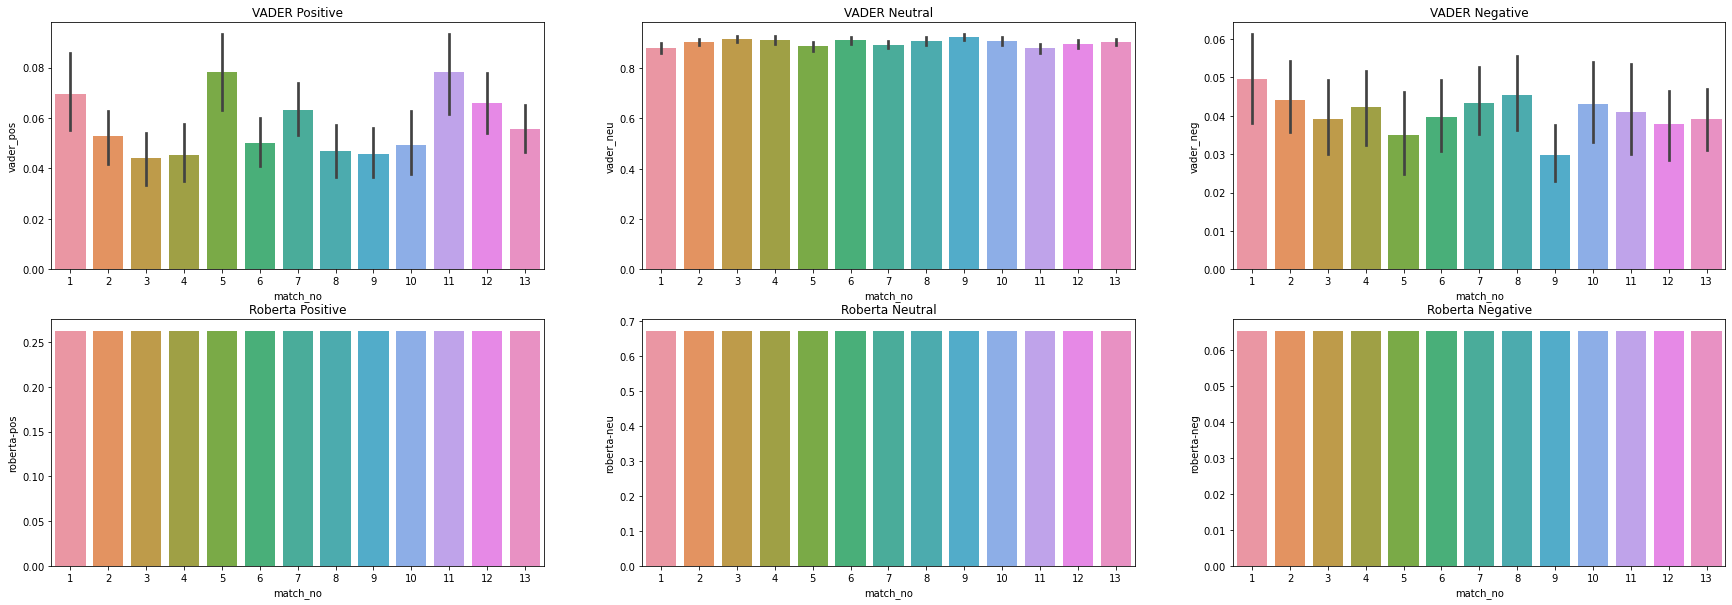

In [32]:
fig,axs = plt.subplots(2,3, figsize=(30,10))
sns.barplot(data=matchwisesentiment, x="match_no",y="vader_pos",ax=axs[0][0])
sns.barplot(data=matchwisesentiment, x="match_no",y="vader_neu",ax=axs[0][1])
sns.barplot(data=matchwisesentiment, x="match_no",y="vader_neg",ax=axs[0][2])
sns.barplot(data=matchwisesentiment, x="match_no",y="roberta-pos",ax=axs[1][0])
sns.barplot(data=matchwisesentiment, x="match_no",y="roberta-neu",ax=axs[1][1])
sns.barplot(data=matchwisesentiment, x="match_no",y="roberta-neg",ax=axs[1][2])

axs[0][0].set_title("VADER Positive")
axs[0][1].set_title("VADER Neutral")
axs[0][2].set_title("VADER Negative")
axs[1][0].set_title("Roberta Positive")
axs[1][1].set_title("Roberta Neutral")
axs[1][2].set_title("Roberta Negative")

Conclusions

VADER is a Bag of Words (BOW) based model. It does not consider the context of the previous words and hence just aggregates
polarity scores of individual words in a sentence

From the graph we can see that it is not able to predict with confidence the positive and negative sentiments

It can be seen from the fluctuations in the positive and negative sentiment in VADER

RoBERTa is a pretrained Transform model based on the BERT architecture which takes into account the context in which a word
appears in a sentence

From the graph we can see the sentiments are predicted with more confidence explained by the lack of fluctuations in all
sentiments

In terms of our commentary analysis the grouped data on each match along with the mean of sentiments of commentary during the
match suggest that the commentary is largely neutral but slightly skewed towards the positive side

Negative commentary is very low